<a href="https://colab.research.google.com/github/Heitor-Goncalves/EXE.DATASCIENCE-MKT/blob/main/curso_dataScience_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [105]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [106]:
creditcard_df.shape

(8950, 18)

In [107]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [108]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [109]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [110]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [111]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [112]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


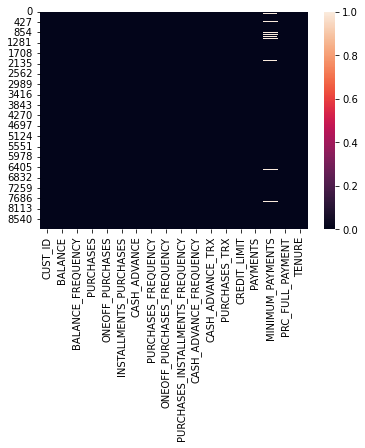

In [113]:
sns.heatmap(creditcard_df.isnull())

In [114]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [115]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [116]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True ), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [117]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True ), 'CREDIT_LIMIT'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [118]:
creditcard_df.duplicated().sum()

0

In [119]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [120]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

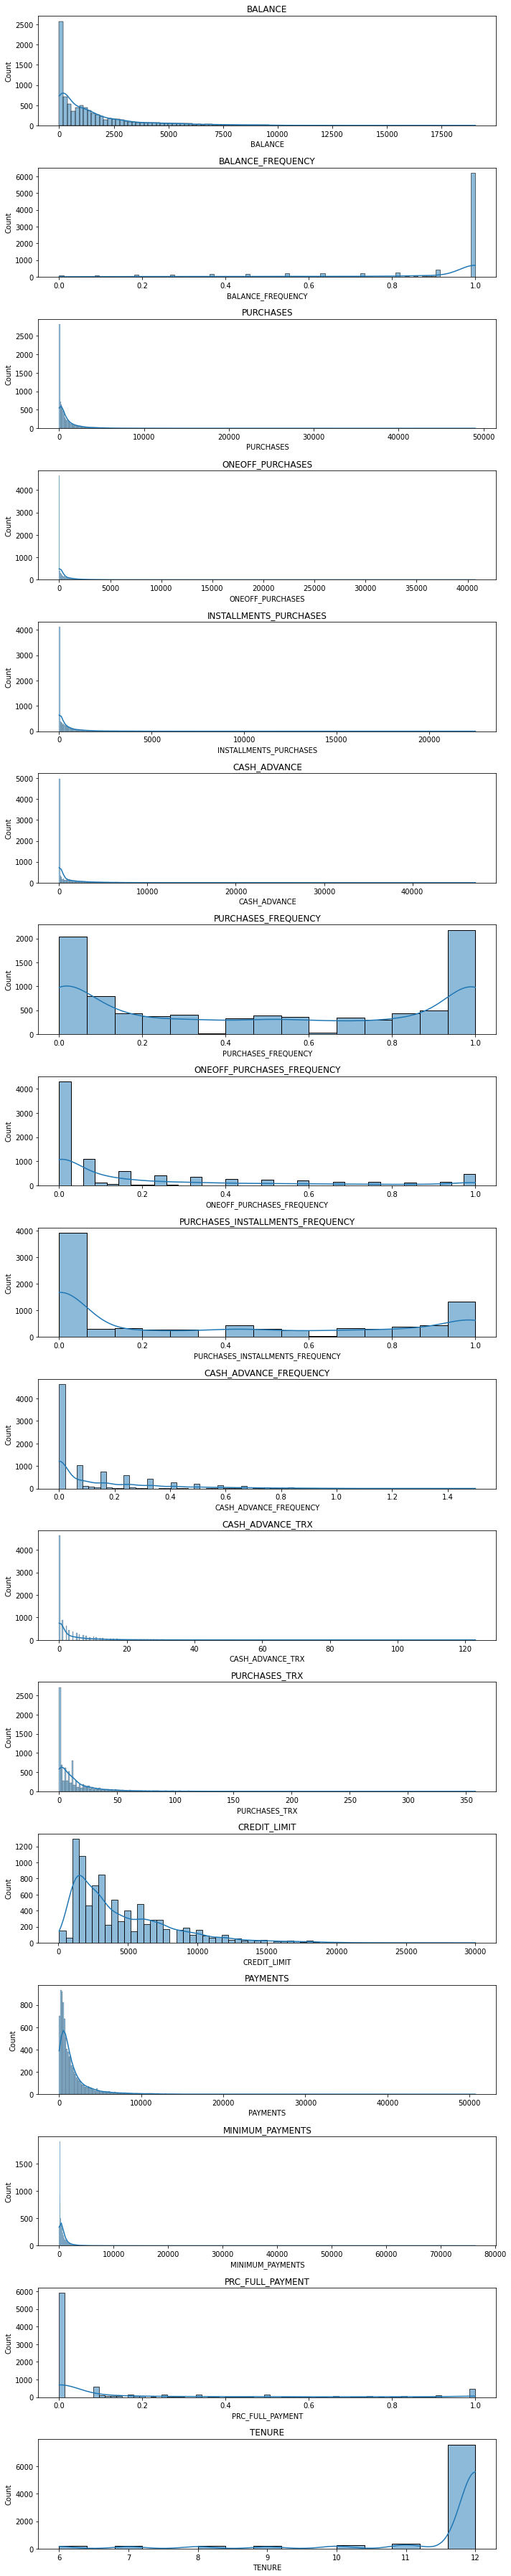

In [139]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i +1)
  sns.histplot(creditcard_df[creditcard_df.columns[i]], kde= True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();  

In [122]:
correlations = creditcard_df.corr()

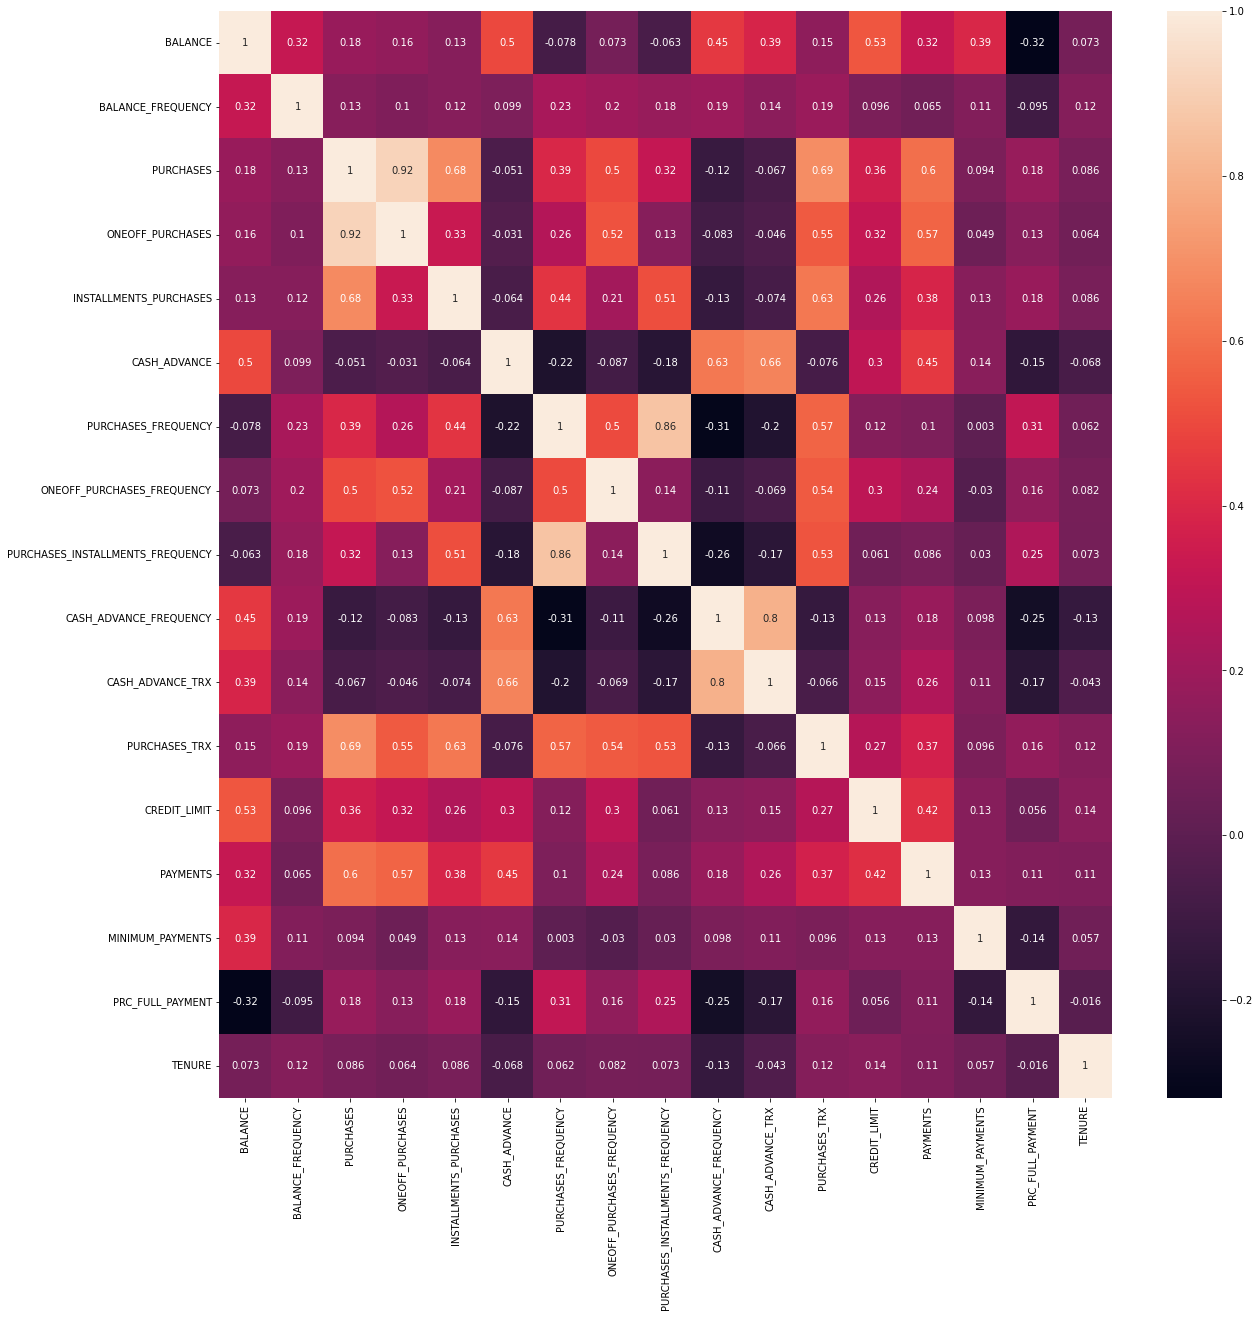

In [123]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [124]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [125]:
scaler = StandardScaler()
creditcard_df_scaled= scaler.fit_transform(creditcard_df)

In [126]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])


(-0.9602684650983495, 0.36067954425377496)

In [127]:
creditcard_df_scaled


array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [128]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [129]:
print(wcss_1)

[152149.9999999998, 127784.75810171213, 111986.59594940534, 99073.50848006658, 91503.04657483459, 84851.11792359487, 79576.24112544107, 75205.00300980601, 69978.76854806277, 66478.24492274669, 63618.02369572539, 61355.36480936817, 59150.845457278294, 57504.23656312125, 55857.99966411813, 54431.167416560435, 52995.046884038566, 52194.68160225831, 50944.82559474218]


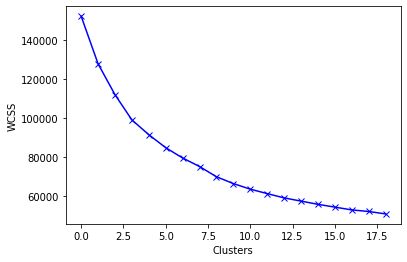

In [130]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [131]:
Kmeans = KMeans(n_clusters=8)
Kmeans.fit(creditcard_df_scaled)
labels = Kmeans.labels_

In [132]:
labels, len(labels)

(array([3, 6, 2, ..., 7, 7, 7], dtype=int32), 8950)

In [133]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2015,  358, 1122, 2752, 1182,   25,  872,  624]))

In [134]:
kmeans.cluster_centers_

array([[ 2.57810050e+00,  4.30369943e-01, -3.30804086e-01,
        -2.34360231e-01, -3.51538889e-01,  1.80879892e+00,
        -7.79002530e-01, -3.89066303e-01, -6.78556796e-01,
         1.24587440e+00,  8.74909931e-01, -4.60820601e-01,
         1.58046306e+00,  4.69388378e-01,  6.50189103e-01,
        -4.91227354e-01,  8.87667796e-02],
       [ 2.69098933e-01,  1.92154918e-01, -1.88680740e-01,
        -8.23544164e-02, -2.94214743e-01, -2.08135458e-01,
        -5.26670661e-01, -1.99242151e-01, -5.48407865e-01,
        -3.86494187e-01, -3.38396960e-01, -3.78310359e-01,
         1.19997380e+00,  9.63487842e-03, -5.83999008e-02,
        -3.77545211e-01,  2.67274396e-01],
       [-1.42222546e-01,  4.16756451e-01,  2.26185259e-01,
         4.29292981e-01, -2.53890814e-01, -3.49103913e-01,
         7.92271931e-01,  1.77843383e+00, -3.14444219e-01,
        -4.30699561e-01, -3.48240613e-01,  2.44238470e-01,
        -4.42512315e-02, -9.03596773e-02, -1.45007979e-01,
        -2.83903061e-01,  2.5

In [135]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [creditcard_df.columns])

In [136]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.578100,0.430370,-0.330804,-0.234360,-0.351539,1.808799,-0.779003,-0.389066,-0.678557,1.245874,0.874910,-0.460821,1.580463,0.469388,0.650189,-0.491227,0.088767
1,0.269099,0.192155,-0.188681,-0.082354,-0.294215,-0.208135,-0.526671,-0.199242,-0.548408,-0.386494,-0.338397,-0.378310,1.199974,0.009635,-0.058400,-0.377545,0.267274
2,-0.142223,0.416756,0.226185,0.429293,-0.253891,-0.349104,0.792272,1.778434,-0.314444,-0.430700,-0.348241,0.244238,-0.044251,-0.090360,-0.145008,-0.283903,0.257949
3,-0.346647,-0.362321,-0.300899,-0.222197,-0.302824,0.052558,-0.217800,-0.286014,-0.244732,0.308939,-0.004856,-0.398456,-0.584136,-0.403670,-0.210757,-0.074327,-3.304931
4,1.632110,0.315239,12.962682,13.799632,5.297105,0.039880,1.010796,2.162653,0.796413,-0.457215,-0.189976,4.308761,3.103291,9.204770,0.810485,1.349844,0.289514
5,-0.192300,0.398107,-0.381737,-0.269724,-0.407066,-0.260094,-0.889644,-0.441215,-0.764012,-0.158583,-0.217833,-0.500179,-0.613579,-0.348900,-0.083605,-0.458106,0.273874
6,0.877905,0.470510,3.503962,3.864420,1.185269,-0.269111,1.106513,2.242999,0.790242,-0.362161,-0.266560,3.352535,1.350917,1.990656,0.220803,0.710950,0.342153
7,-0.703432,0.299476,-0.005491,-0.293548,0.525678,-0.462945,1.064771,-0.495387,1.280588,-0.660412,-0.470089,0.145728,-0.170437,-0.244667,-0.282265,2.045127,0.098660
8,-0.699100,-2.369952,-0.331183,-0.240763,-0.340520,-0.296667,-0.629648,-0.471219,-0.485336,-0.495678,-0.364128,-0.439881,-0.324313,-0.277420,-0.235825,-0.329159,0.172512
9,1.162456,0.420078,-0.268635,-0.188825,-0.288440,2.159287,-0.559619,-0.169516,-0.527059,3.366796,4.725404,-0.265408,0.599444,0.811951,0.279398,-0.303164,-0.122499


In [137]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6930.573392,0.979221,296.436806,203.447389,93.175389,4772.006934,0.177699,0.086392,0.094762,0.384456,9.219444,3.255556,10244.734848,3091.977215,2379.444820,0.010039,11.636111
1,2124.581543,0.922790,600.085524,455.745907,145.012903,542.401333,0.278972,0.143020,0.146486,0.057803,0.939516,5.306452,8860.282258,1761.035881,728.108037,0.043289,11.875000
2,1268.450603,0.975996,1486.453126,1304.975794,181.477332,246.783898,0.808328,0.732999,0.239469,0.048957,0.872340,20.780687,4333.030799,1471.561440,526.271564,0.070678,11.862520
3,842.957446,0.791440,360.328520,223.636061,137.227219,1089.087820,0.402937,0.117134,0.267175,0.196966,3.215686,4.805704,2368.599299,564.559575,373.046095,0.131975,7.094474
4,4961.573491,0.951948,28698.173810,23496.999524,5201.174286,1062.501944,0.896032,0.847619,0.680952,0.043651,1.952381,121.809524,15785.714286,28380.051021,2753.008689,0.548521,11.904762
5,1164.219471,0.971579,187.617533,144.751036,42.962862,433.441559,0.133293,0.070835,0.060799,0.103410,1.762275,2.277246,2261.467066,723.113698,669.368721,0.019726,11.883832
6,3391.759279,0.988730,8489.474050,7006.582397,1482.891653,414.532146,0.934448,0.871588,0.678500,0.062672,1.429752,98.041322,9409.504132,7495.897429,1378.778749,0.361655,11.975207
7,100.340674,0.948214,991.473785,105.207236,886.431633,8.053277,0.917695,0.054674,0.873376,0.002989,0.040816,18.332096,3873.891044,1024.857414,206.398992,0.751879,11.649351
8,109.356256,0.315851,295.627312,192.820157,103.139843,356.747137,0.237642,0.061884,0.171552,0.035954,0.763923,3.776029,3313.996503,930.041422,314.625813,0.057441,11.748184
9,3984.029561,0.976783,429.261579,279.026917,150.234662,5506.997055,0.265748,0.151888,0.154971,0.808874,35.496241,8.112782,6675.187970,4083.662388,1515.331865,0.065044,11.353383
